In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import accuracy_score

diabetes=pd.read_csv('/kaggle/input/diabetes-dt/diabetes_DT.csv')
diabetes.columns



In [ ]:
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)      #Decision Treee
y_pred=dtc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

In [ ]:
#Plottinge
plt.figure(figsize=(88,88))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["No", "Yess"], rounded=True, fontsize=10)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()


In [ ]:
#2 Implement a simple Naive Bayes model on a loan dataset
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB #Import statement for Naive_baye GaussianNB


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("burak3ergun/loan-data-set")

print("Path to dataset files:", path)

In [ ]:
Data=pd.read_csv('/kaggle/input/loan-data-set/loan_data_set.csv')
Data.columns

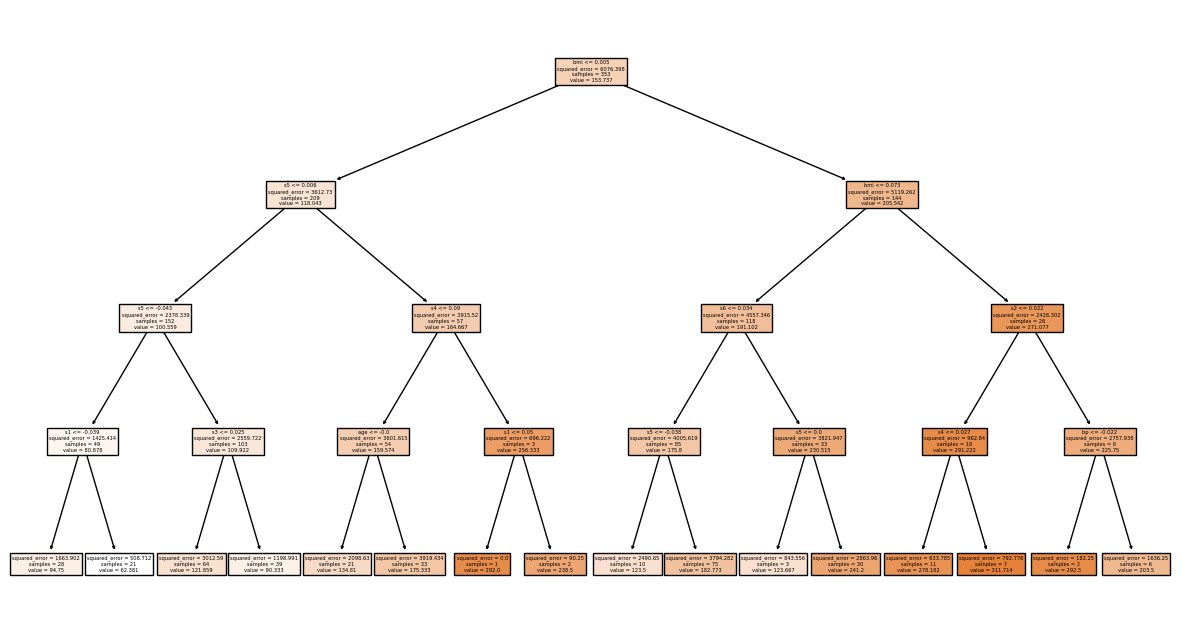

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=data.feature_names, filled=True)
plt.show()

# Predict
y_pred = dt.predict(X_test)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
Accuracy: 1.0
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[38  5]
 [ 3 68]]


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793103
Confusion Matrix:
 [[39  4]
 [ 1 70]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
